# **Project: Enhancing Road Safety in Barcelona**

## Introduction

In the vibrant and bustling city of Barcelona, the issue of road safety is of paramount importance. This comprehensive project aims to dissect and address the challenges related to road safety, exploring how Uber, as a prominent player in modern transportation, can contribute to its alleviation.

## Objectives

- Analyze the existing road safety problems in Barcelona.
- Explore the potential of Uber's services to mitigate these issues.
- Develop data-driven strategies for improving road safety.
- Implement machine learning models to forecast the impact of proposed solutions.
- Provide actionable recommendations for stakeholders and decision-makers.

## Tools and Technologies

To accomplish our objectives, we will utilize a powerful toolkit of data analysis and machine learning libraries, including:

- **NumPy**: For efficient numerical computations and data manipulation.
- **Pandas**: To handle and analyze structured data.
- **Matplotlib** and **Seaborn**: For data visualization and exploration.
- **Scikit-Learn (sklearn)**: To build and evaluate machine learning models.
- **Geospatial Data Tools**: To analyze geographic and spatial aspects of road safety.

## Project Overview

Our project will follow a structured approach, including the following key phases:

1. **Data Collection**: We will gather relevant datasets related to road accidents, traffic patterns, and demographic information in Barcelona.

2. **Data Preprocessing**: This phase involves data cleaning, feature engineering, and preparation for analysis. We will ensure that the data is in a suitable format for our models.

3. **Exploratory Data Analysis (EDA)**: Utilizing NumPy, Pandas, Matplotlib, and Seaborn, we will perform in-depth exploratory analysis to understand the current state of road safety in Barcelona.

4. **Machine Learning Modeling**: Using Scikit-Learn, we will build predictive models to forecast road safety trends and assess the impact of potential solutions.

5. **Solution Proposals**: Based on our analysis, we will propose data-driven solutions that address road safety challenges, considering both short-term and long-term strategies.

6. **Implementation Strategy**: We will outline a practical roadmap for stakeholders, including resource allocation, potential obstacles, and key performance indicators (KPIs).

7. **Feasibility Analysis**: We will conduct a feasibility study to assess the technical, economic, legal, operational, and scheduling aspects of our proposed solutions (TELOS analysis).

8. **Forecasted Impacts**: Using machine learning models, we will forecast the potential impacts of our solutions, offering a glimpse into a future where road safety in Barcelona has improved.

---
*Project Team: Data Dynamos
1. Khwapun
2. Anhad 
3. Shrimanyu
4. Altyngul


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 



### Data Collection

After a comprehensive web research, we would be using the following datasets for our analysis. We believe the inclusion of these datasets would enrich our report.

- accidents_2017.csv (provided by UGH)
- accidents_opendata.csv (Barcelona traffic accidents. (2022, June 12). Kaggle. https://www.kaggle.com/datasets/emmanuelfwerr/barcelona-car-accidents)


In [2]:
!unzip "../CSVs/archive (1).zip"

Archive:  ../CSVs/archive (1).zip
replace accidents_opendata.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [4]:
# importing datasets
df_accidents_2017 = pd.read_csv('../CSVs/Barcelona data sets/accidents_2017.csv')
df_accidents_updated = pd.read_csv('accidents_opendata.csv')
df

/var/folders/tv/pb9fh99534330fzc4_z2rzxc0000gn/T/ipykernel_9727/3016131811.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_accidents_updated = pd.read_csv('accidents_opendata.csv')


NameError: name 'df' is not defined

In [115]:
# pre-defined functions
def find_percentage(key_list, value_list, decimal_places=2, as_string=False):
    """
    Calculate the percentage values for a list of numeric values and round them to a specified number of decimal places.

    Args:
        key_list (list): A list of keys or labels corresponding to the values.
        value_list (list): A list of numeric values for which percentages will be calculated.
        decimal_places (int, optional): The number of decimal places to round the percentage values to. Default is 2.
        as_string (bool, optional): If True, returns the percentages as strings with '%' sign. Default is False.

    Returns:
        dict or list: If `as_string` is False (default), returns a dictionary where keys are taken from the `key_list`, 
                      and values are the corresponding percentages of the total sum of `value_list` rounded to the specified 
                      decimal places. If `as_string` is True, returns a list of strings where each string represents 
                      a key-value pair as "<key>: <value>%".

    Example:
        key_list = ["A", "B", "C"]
        value_list = [10, 20, 30]
        decimal_places = 2
        as_string = False

        result = find_percentage(key_list, value_list, decimal_places, as_string)

        The result would be: {'A': 16.67, 'B': 33.33, 'C': 50.00}

        key_list = ["A", "B", "C"]
        value_list = [10, 20, 30]
        decimal_places = 2
        as_string = True

        result = find_percentage(key_list, value_list, decimal_places, as_string)

        The result would be: ['A: 16.67%', 'B: 33.33%', 'C: 50.00%']
    """
    output = {}
    sum_value_list = sum(value_list)
    for index, value in enumerate(value_list):
        percentage_value = round((value / sum_value_list) * 100, decimal_places)
        output[key_list[index]] = percentage_value
    if as_string:
        return [f'{key}: {value}%' for key, value in output.items()]
    else:
        return output
    


def add_labels_above_bars(key_list, value_list, offset=5):
    """
    Add data labels slightly above the bars in a bar chart.

    Args:
        x_values (list): List of keys.
        y_values (list): List of values.
        offset (int, optional): Vertical offset for the labels. Defaults to 5.

    Returns:
        None
    """
    for x, y in zip(key_list, value_list):
        plt.text(x, y + offset, y, ha='center', va='bottom', fontsize=12)


def translate_column(dataset, column_name, spanish_phrases, english_translations):
    """
    Translate a specific column in a dataset from Spanish to English.

    Args:
        dataset (pd.DataFrame): The dataset containing the column to be translated.
        column_name (str): The name of the column to be translated.
        spanish_phrases (list): List of Spanish phrases in the column.
        english_translations (list): List of corresponding English translations.

    Returns:
        pd.DataFrame: A new DataFrame with the specified column translated.

    Example:
        # Assuming df_accidents_updated is your dataset
        spanish_phrases = ["Phrase1 in Spanish", "Phrase2 in Spanish", ...]
        english_translations = ["Translation1 in English", "Translation2 in English", ...]
        translated_df = translate_column(df_accidents_updated, 'cause_incident', spanish_phrases, english_translations)
    """
    # Create a translation dictionary
    translation_dict = dict(zip(spanish_phrases, english_translations))

    # Create a copy of the original dataset to avoid modifying it in place

    # Replace Spanish phrases with English translations in the specified column
    dataset[column_name] = dataset[column_name].replace(translation_dict)

def order_lists(list1, list2, ascending=True):
    """
    Orders two lists based on the values in list1 (alpha_list) in ascending or descending order.

    Args:
    list1 (list): The list to use for ordering (alpha_list).
    list2 (list): The corresponding list to be ordered.
    ascending (bool, optional): If True, orders in ascending order; if False, orders in descending order. Default is True.

    Returns:
    tuple: A tuple containing the ordered list1 (alpha_list) and list2.

    Example:
    list1 = [3, 1, 2]
    list2 = ['C', 'A', 'B']
    ordered_list1, ordered_list2 = order_lists(list1, list2, ascending=True)
    # Output: ([1, 2, 3], ['A', 'B', 'C'])
    """
    # Create a list of tuples with values from list1 (alpha_list) and list2
    combined_list = list(zip(list1, list2))

    # Sort the combined list based on values from list1 (alpha_list)
    combined_list.sort(key=lambda x: x[0], reverse=not ascending)

    # Unzip the sorted list into two separate lists
    ordered_list1, ordered_list2 = zip(*combined_list)

    return ordered_list1, ordered_list2




### Exploratory Data Analysis

In [63]:
df_accidents_2017

,Id,District Name,Neighborhood Name,Street,Weekday,Month,Day,Hour,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude
0,2017S008429,Unknown,Unknown,Número 27 ...,Friday,October,13,8,Morning,2,0,2,2,2.125624,41.340045
1,2017S007316,Unknown,Unknown,Número 3 Zona Franca / Número 50 Zona Franca ...,Friday,September,1,13,Morning,2,0,2,2,2.120452,41.339426
2,2017S010210,Unknown,Unknown,Litoral (Besòs) ...,Friday,December,8,21,Afternoon,5,0,5,2,2.167356,41.360886
3,2017S006364,Unknown,Unknown,Número 3 Zona Franca ...,Friday,July,21,2,Night,1,0,1,2,2.124529,41.337668
4,2017S004615,Sant Martí,el Camp de l'Arpa del Clot,Las Navas de Tolosa ...,Thursday,May,25,14,Afternoon,1,0,1,3,2.185272,41.416365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10334,2017S003667,Sant Andreu,el Bon Pastor,Litoral (Llobregat) ...,Tuesday,April,25,8,Morning,1,0,1,3,2.201800,41.392004
10335,2017S001896,Sant Andreu,el Bon Pastor,PL MONTERREY ...,Wednesday,March,8,12,Morning,1,0,1,2,2.206013,41.443445
10336,2017S010718,Sant Andreu,el Bon Pastor,Litoral (Llobregat) ...,Thursday,December,28,8,Morning,1,0,1,2,2.205607,41.443894
10337,2017S006145,Sant Andreu,el Bon Pastor,Litoral (Besòs) ...,Friday,July,14,14,Afternoon,1,0,1,2,2.205118,41.444824


In [64]:
df_accidents_updated

,case_id,district_id,district_name,neighborhood_id,neighborhood_name,street_code,street_name,postal_code,weekday_name,weekday,...,cause_incident,n_deaths,n_wounded_mild,n_wounded_severe,n_victims,n_vehicles,utm_coordinate_y,utm_coordinate_x,longitude,latitude
0,2015S005807,-1.0,Desconegut,-1.0,Desconegut,-1.0,Desconegut,Desconegut,Dimarts,Dm,...,No és causa del vianant,0.0,2.0,0.0,2.0,2.0,-1,-1,NaN,NaN
1,2015S007685,10.0,Sant Martí,64.0,el Camp de l'Arpa del Clot,134801.0,Freser,0208 0208,Dimarts,Dm,...,Desobeir el senyal del semàfor,0.0,1.0,0.0,1.0,1.0,"4585420,58","431779,16",NaN,NaN
2,2015S001364,10.0,Sant Martí,64.0,el Camp de l'Arpa del Clot,161407.0,Indústria,0336 0336,Dissabte,Ds,...,No és causa del vianant,0.0,1.0,0.0,1.0,1.0,"4585555,86","431913,65",NaN,NaN
3,2015S004325,10.0,Sant Martí,64.0,el Camp de l'Arpa del Clot,226400.0,Las Navas de Tolosa,0343 0343,Divendres,Dv,...,No és causa del vianant,0.0,1.0,0.0,1.0,2.0,"4585565,44","431946,45",NaN,NaN
4,2015S005540,10.0,Sant Martí,64.0,el Camp de l'Arpa del Clot,95506.0,Conca,0032 0034,Divendres,Dv,...,No és causa del vianant,0.0,2.0,0.0,2.0,1.0,"4585260,16","431530,84",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110650,2019S010046,4.0,Les Corts,21,Pedralbes,101700.0,Doctor Ferran / Manila ...,0025 0025,Dimarts,Dm,...,No és causa del vianant,0.0,1.0,0.0,1.0,1.0,"4582580,73","426884,52",2.124247,41.389610
110651,2019S010047,10.0,Sant Martí,64,el Camp de l'Arpa del Clot,297001.0,Sant Antoni Maria Claret ...,0346 0348,Dimarts,Dm,...,No és causa del vianant,0.0,1.0,0.0,1.0,2.0,"4585401,31","431576,15",2.180038,41.415427
110652,2019S010048,2.0,Eixample,5,el Fort Pienc,28305.0,Ausiàs Marc / Nàpols ...,0080 0080,Dimarts,Dm,...,No és causa del vianant,0.0,1.0,0.0,1.0,2.0,"4583086,37","431561,78",2.180128,41.394576
110653,2019S010049,4.0,Les Corts,19,les Corts,167800.0,Joaquim Molins ...,0009 0009,Dimarts,Dm,...,No és causa del vianant,0.0,1.0,0.0,1.0,2.0,"4582172,65","427314,36",2.129436,41.385974


In [106]:
df_accidents_updated.columns

Index(['case_id', 'district_id', 'district_name', 'neighborhood_id',
       'neighborhood_name', 'street_code', 'street_name', 'postal_code',
       'weekday_name', 'weekday', 'type_day', 'year', 'month', 'month_name',
       'day', 'hour', 'cyrcadian', 'cause_incident', 'n_deaths',
       'n_wounded_mild', 'n_wounded_severe', 'n_victims', 'n_vehicles',
       'utm_coordinate_y', 'utm_coordinate_x', 'longitude', 'latitude'],
      dtype='object')

In [65]:
df_accidents_updated.isna().sum()

case_id                  0
district_id              1
district_name            1
neighborhood_id          1
neighborhood_name        1
street_code              1
street_name              2
postal_code           4804
weekday_name             0
weekday               7660
type_day              7660
year                     1
month                    1
month_name               1
day                      1
hour                     1
cyrcadian                0
cause_incident           1
n_deaths                 1
n_wounded_mild           1
n_wounded_severe         1
n_victims                1
n_vehicles               1
utm_coordinate_y         1
utm_coordinate_x         1
longitude            56310
latitude             56310
dtype: int64

## Data Exploration Notes

In the process of data exploration, we have identified that the dataset contains missing values for certain columns. We want to emphasize that we will impute these missing values when there is a specific question or analysis related to the particular data point. Otherwise, imputing missing values at this stage would not be a meaningful use of our time and resources.

Additionally, it's worth noting that the dataset is primarily in Spanish. To enhance readability and consistency, we have chosen to convert the `weekday_name`, `cause_incident` and `month_name` columns to English for better understanding and analysis. However, other columns, such as street names and numerical data, will remain in their original Spanish language as they are integral to the dataset's context and analysis.



In [71]:
# cause_incident
translate_column(column_name='cause_incident', dataset=df_accidents_updated, 
                                        spanish_phrases=['Altres', 'Creuar per fora pas de vianants', 'Desconegut','Desobeir altres senyals', 'Desobeir el senyal del semàfor','No és causa del  vianant', 'Transitar a peu per la calçada','nan'],
                                        english_translations=['Others', 'Crossing over the pedestrian crossing', 'Unknown', 'Disobeying other signals', 'Disobeying traffic signals', 'not caused by the pedestrian', 'Walking along the road', 'nan'])

In [75]:
# weekday_name
translate_column(column_name = 'weekday_name', dataset=df_accidents_updated, spanish_phrases = ["Dilluns", "Dimarts", "Dimecres","Dijous", "Divendres", "Dissabte", "Diumenge"], english_translations=["Monday", "Tuesday", "Wednesday","Thursday", "Friday", "Saturday", "Sunday"])

In [139]:
# month_name
spanish_months = ["Gener", "Febrer", "Març", "Abril", "Maig", "Juny", "Juliol", "Agost", "Setembre", "Octubre", "Novembre", "Desembre"]

# List of English translations with capitalized first letter
english_months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

# Replace the column values with translations
translate_column(column_name='month_name', dataset=df_accidents_updated, spanish_phrases=spanish_months, english_translations=english_months)

## Exploratory Data Analysis (EDA) Questions

In the EDA phase of our analysis, we will explore various aspects of the dataset to gain insights and answer specific questions. Below are the categories of questions we intend to address:

### 1. District-wise Analysis

**Question:** How do districts vary in terms of the number of accidents occurring within them?

**Approach:** We will create a bar chart that visualizes the number of accidents per district, as there are 10 districts. Additionally, we will calculate statistical measures such as standard deviation, interquartile range (IQR), range, mean, median, mode, Q1, and Q3 for a comprehensive understanding of the distribution. ✅

### 2. Total Deaths due to Accidents

**Question:** What is the total number of deaths resulting from accidents?

**Approach:** We will calculate the sum of deaths to determine the total fatalities due to accidents.

### 3. Yearly Accidents Trend

**Question:** How does the number of accidents vary over the years?

**Approach:** We will visualize the yearly trend of accidents using a line graph, allowing us to identify any patterns or fluctuations.
### 4. Month Accidents Trend

**Question:** How does the number of accidents vary over months?

**Approach:** We will visualise the mothly trend of accidents using a line graph, allowins us to identify any patterns or flucutations

### 5. Time of Day Analysis

**Question:** How do accidents vary based on the time of day?

**Approach:** We will create a heatmap that illustrates the distribution of accidents throughout the day, helping us identify peak hours and potential trends.

### 6. Severity Distribution

**Question:** What is the distribution of accident severity levels?

**Approach:** We will analyze the distribution of accident severity levels, which may include categories like minor, moderate, and severe, to understand the overall severity distribution.

### 7. Location-wise Analysis

**Question:** How do accidents vary across different locations within the dataset?

**Approach:** We will create a heatmap that provides insights into the spatial distribution of accidents, potentially revealing accident hotspots.

### 8. Weekdays vs. Non-Weekdays Comparison

**Question:** Are there significant differences in the number of accidents on weekdays compared to non-weekdays?

**Approach:** We will compare the frequency of accidents on weekdays and non-weekdays, potentially using bar charts or statistical tests to identify any variations.

These categories of questions will guide our exploratory analysis, enabling us to uncover valuable insights and trends within the dataset.

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


### Problem 1: District-Wise Analysis

In [85]:
unique_districs, freq_district = df_accidents_updated['district_name'].value_counts().index, df_accidents_updated['district_name'].value_counts().values

/var/folders/tv/pb9fh99534330fzc4_z2rzxc0000gn/T/ipykernel_6660/472166452.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=unique_districs, rotation=45)


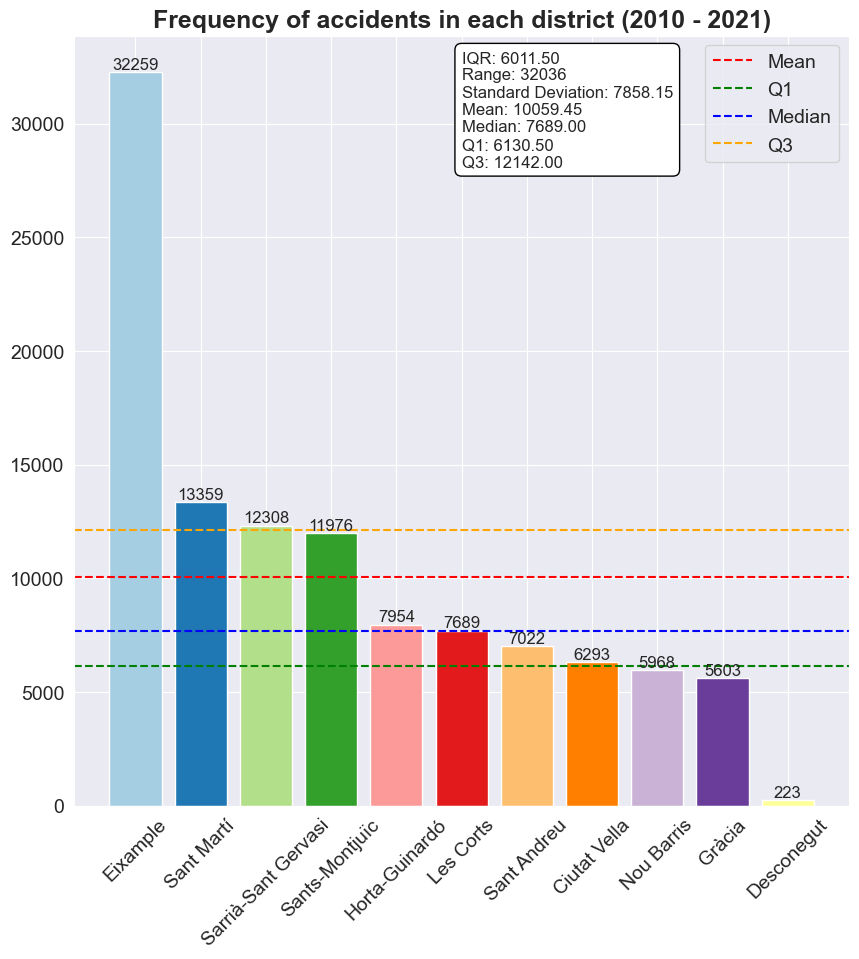

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style('darkgrid')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Custom colors using a colormap
cmap = plt.get_cmap("Paired")
colors = cmap(range(len(unique_districs)))

# Bar chart with customizations
bars = ax.bar(unique_districs, freq_district, color=colors)

# Calculate statistical measures
mean_value = np.mean(freq_district)
median_value = np.median(freq_district)
q1_value = np.percentile(freq_district, 25)
q3_value = np.percentile(freq_district, 75)
iqr_value = q3_value - q1_value
range_value = max(freq_district) - min(freq_district)
std_deviation = np.std(freq_district)

# Add mean line, Q1 line, median line
ax.axhline(mean_value, color='red', linestyle='--', label='Mean')
ax.axhline(q1_value, color='green', linestyle='--', label='Q1')
ax.axhline(median_value, color='blue', linestyle='--', label='Median')
ax.axhline(q3_value, color='orange', linestyle='--', label='Q3')
ax.legend()
# Add a title with custom font properties
ax.set_title("Frequency of accidents in each district (2010 - 2021)", fontsize=18, fontweight='bold')

# Rotate x-axis labels for better readability
ax.set_xticklabels(labels=unique_districs, rotation=45)

# Add labels above the bars
add_labels_above_bars(key_list=unique_districs, value_list=freq_district)

# Customize the font for the chart
plt.rcParams['font.size'] = 14

# Generate a callout box
callout_text = f"IQR: {iqr_value:.2f}\nRange: {range_value}\nStandard Deviation: {std_deviation:.2f}\nMean: {mean_value:.2f}\nMedian: {median_value:.2f}\nQ1: {q1_value:.2f}\nQ3: {q3_value:.2f}"

ax.annotate(callout_text, xy=(0.5, 0.83), xycoords='axes fraction', bbox=dict(boxstyle="round,pad=0.4", edgecolor="black", facecolor="white"), fontsize=12)

# Show the bar chart
plt.show()
fig.savefig('freq_of_accidents_district_wise_bar.png')


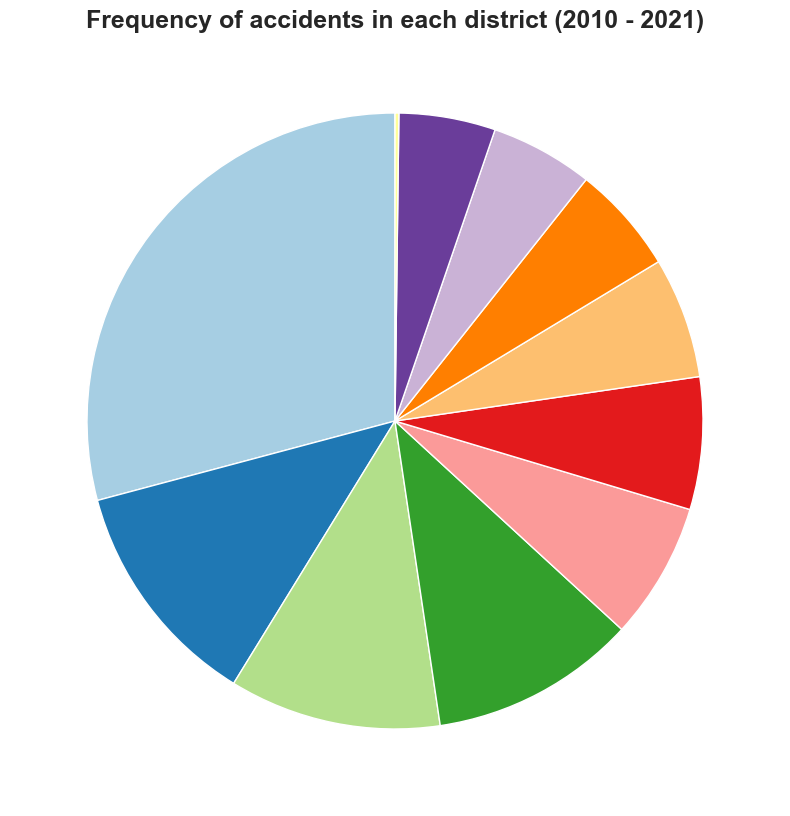

In [94]:
sns.set_style('darkgrid')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Custom colors using a colormap
cmap = plt.get_cmap("Paired")
colors = cmap(range(len(unique_districs)))

# Pie chart with customizations
ax.pie(freq_district, colors=colors, startangle=90)

# Add a title with custom font properties
ax.set_title("Frequency of accidents in each district (2010 - 2021)", fontsize=18, fontweight='bold')

# Customize the font for the chart
plt.rcParams['font.size'] = 14

# Show the pie chart
plt.show()
fig.savefig('freq_of_accidents_district_wise_pie.png')


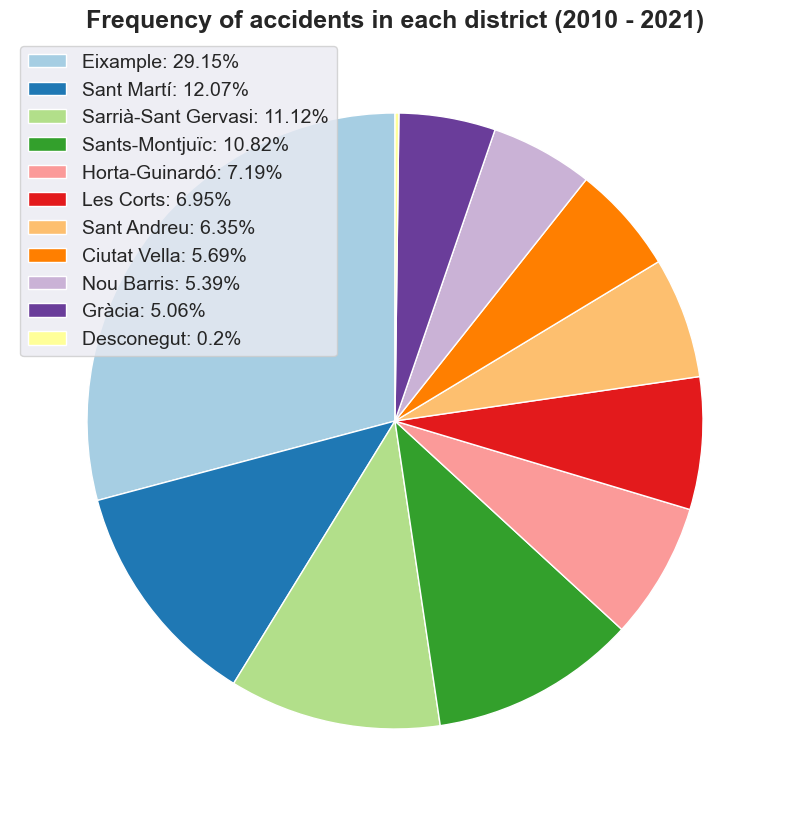

In [92]:
sns.set_style('darkgrid')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Custom colors using a colormap
cmap = plt.get_cmap("Paired")
colors = cmap(range(len(unique_districs)))

# Pie chart with customizations
ax.pie(freq_district, colors=colors, startangle=90)

# Add a title with custom font properties
ax.set_title("Frequency of accidents in each district (2010 - 2021)", fontsize=18, fontweight='bold')

# adding a legend
ax.legend(find_percentage(key_list=unique_districs, value_list=freq_district, as_string=True))
# Customize the font for the chart
plt.rcParams['font.size'] = 14

# Show the pie chart
plt.show()


### 1. District-wise Analysis

**Question:** How do districts vary in terms of the number of accidents occurring within them?

**Analysis:**

- **Range:** The range of accident counts across districts is quite extensive, with values ranging from the lowest at 5603 to the highest at 37639, resulting in a range of 32036. Notably, Eixample, with 37639 accidents, is considerably higher than all other districts.

- **Standard Deviation (STD):** The standard deviation is 7858.15, indicating a notable dispersion of accident counts from the mean.

- **Mean:** The mean number of accidents across districts is 10,059.45.

- **Median:** The median accident count is 7,689, suggesting that the distribution is somewhat right-skewed.

- **Q1 (First Quartile):** The first quartile, Q1, is at 6,130.50.

- **Q3 (Third Quartile):** The third quartile, Q3, is at 12,142.00.

- **Interquartile Range (IQR):** The IQR, a measure of data spread, is 6,011.50. Interestingly, Gracia and Eixample fall considerably outside the IQR, suggesting that they may be outliers in terms of accident rates.

**Observations:**

- The most populous district, Eixample, experiences the highest number of accidents (32,259). This substantial count in Eixample is considerably higher than all other districts.

- In contrast, the district with the lowest population density, Gracia, reports the lowest number of accidents (5,603). Despite its lower population, it still maintains a relatively low accident rate, almost six times lower than Eixample.

**Potential Reasons for Variations:**

Several factors may contribute to variations in accident rates among districts:

1. **Population Density:** Districts with higher population densities are more likely to witness increased traffic, leading to a higher probability of accidents.

2. **Infrastructure:** The quality of road infrastructure, signage, and traffic management systems can influence accident rates. Well-maintained districts may have fewer accidents.

3. **Economic Activity:** Districts with higher economic activity and commercial centers may experience more traffic and consequently more accidents.

4. **Enforcement:** Variances in law enforcement and traffic regulations may affect driver behavior and accident rates. Eixample is the perfect example of this. Since it is essentially the economic heartland of Barcelona, it is quite possible be a major contributor to the sheer amount of accidents it has

5. **Geographic Features:** Geographic characteristics such as terrain, proximity to water bodies, and elevation changes can impact road conditions and accident likelihood.


## Total deaths due to accidents

In [105]:
print(f'''Between the years 2010 and 2021, there have been {len(df_accidents_updated)} accidents''')

Between the years 2010 and 2021, there have been 110655 accidents


## Finding yearly distribution of accidents


In [121]:
unique_years, freq_years = order_lists(df_accidents_updated['year'].value_counts().index, df_accidents_updated['year'].value_counts().values, ascending=True)

In [125]:
freq_years

(9056, 8831, 9253, 9457, 9680, 10008, 10140, 10339, 9936, 10027, 6268, 7659)

In [130]:
unique_years = [str(year)[:-2] for year in unique_years]

In [131]:
unique_years

['2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021']

/var/folders/tv/pb9fh99534330fzc4_z2rzxc0000gn/T/ipykernel_6660/2520625907.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=unique_years, rotation=45)


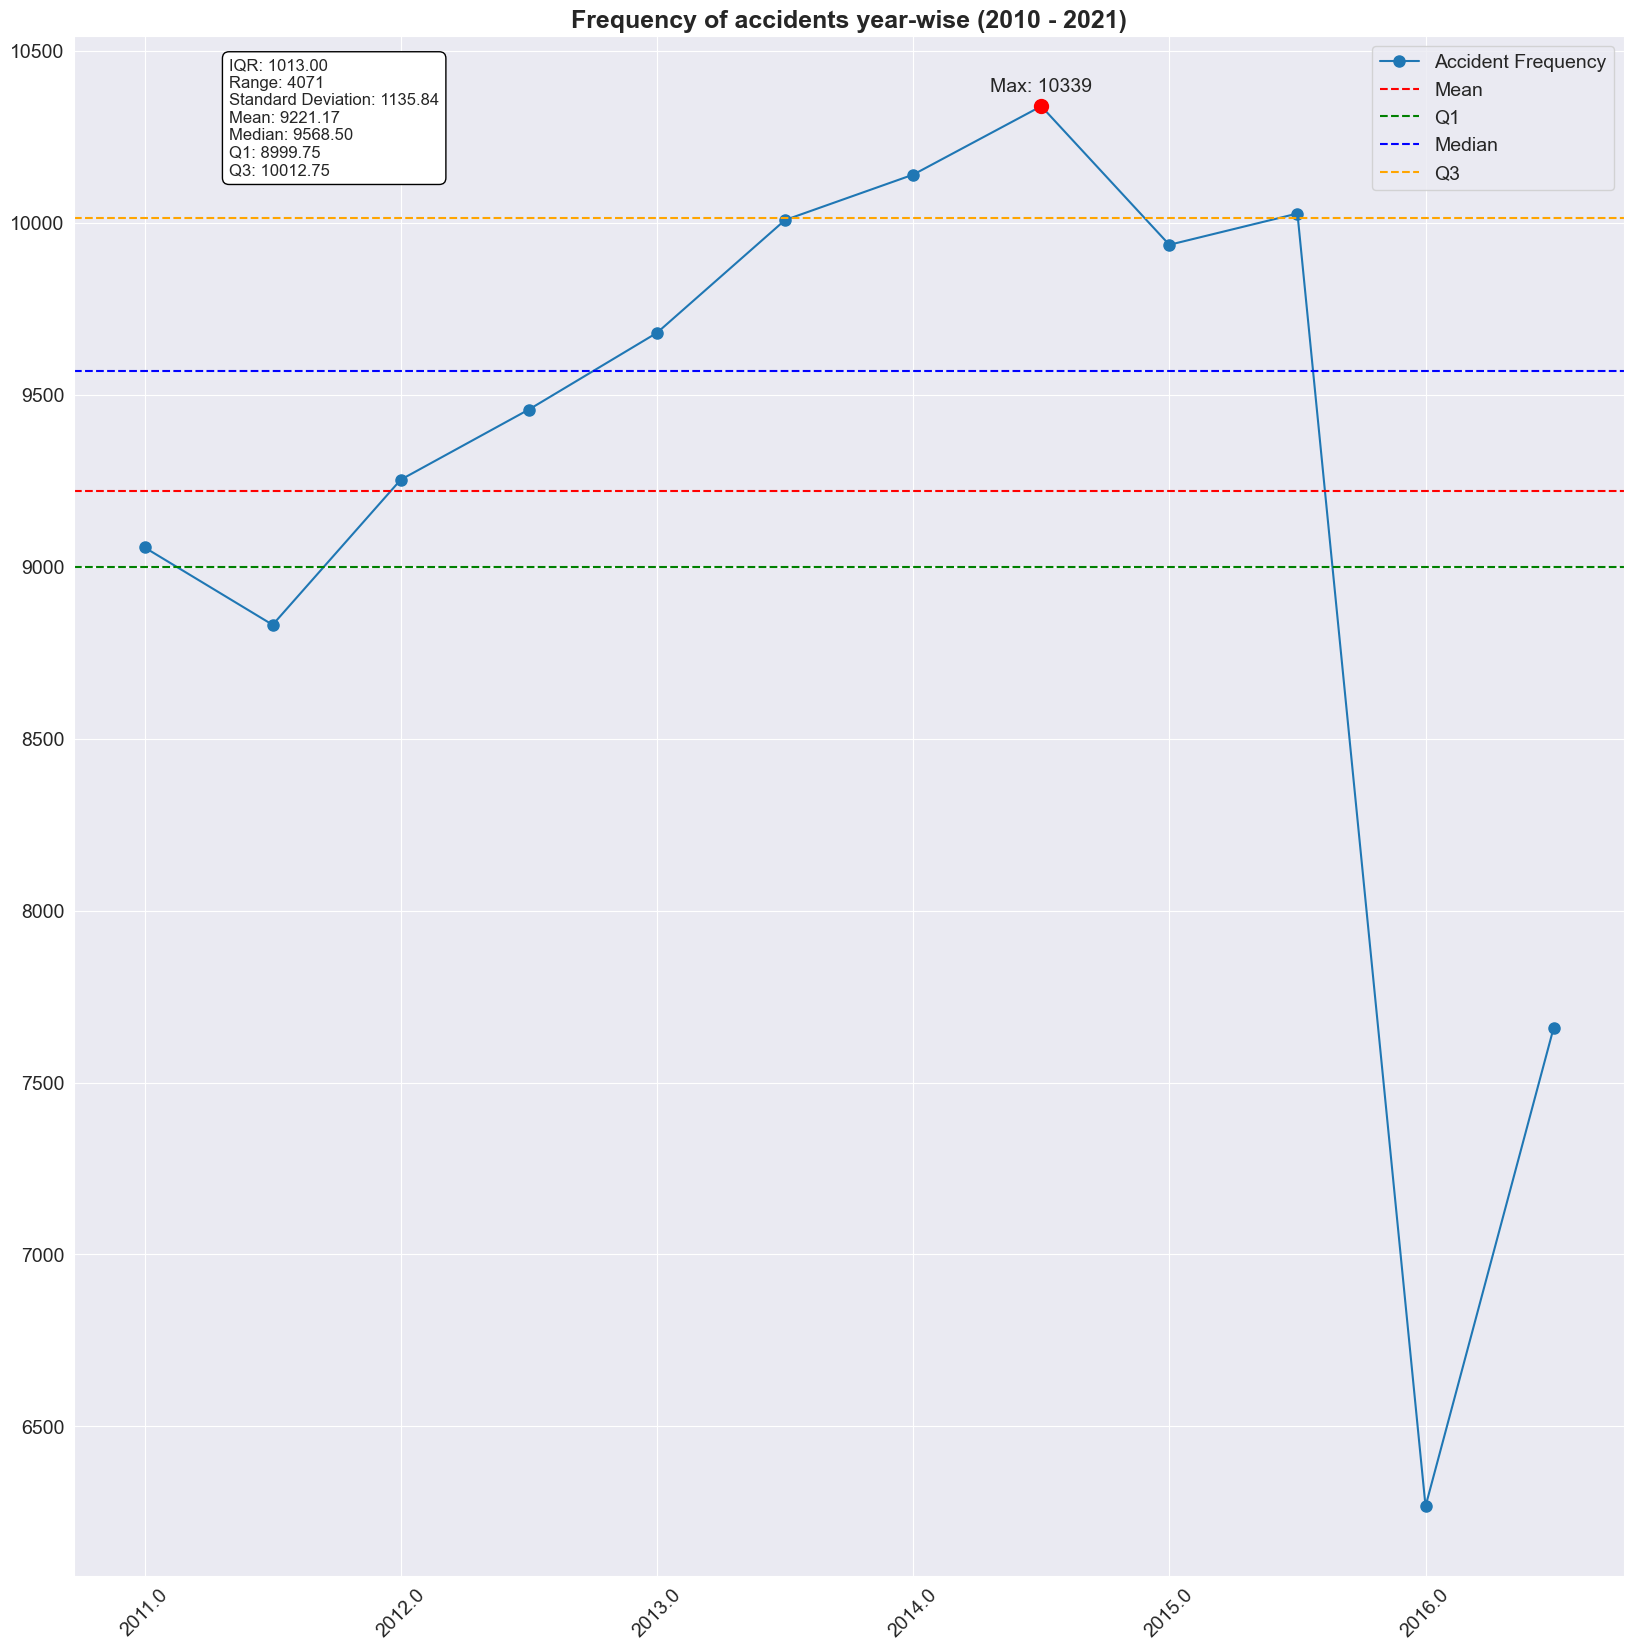

In [153]:
sns.set_style('darkgrid')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(20, 20))

# Line plot with customizations
ax.plot(unique_years, freq_years, marker='o', linestyle='-', markersize=8, label='Accident Frequency')

# Calculate statistical measures
mean_value = np.mean(freq_years)
median_value = np.median(freq_years)
q1_value = np.percentile(freq_years, 25)
q3_value = np.percentile(freq_years, 75)
iqr_value = q3_value - q1_value
range_value = max(freq_years) - min(freq_years)
std_deviation = np.std(freq_years)

# Add mean line, Q1 line, median line
ax.axhline(mean_value, color='red', linestyle='--', label='Mean')
ax.axhline(q1_value, color='green', linestyle='--', label='Q1')
ax.axhline(median_value, color='blue', linestyle='--', label='Median')
ax.axhline(q3_value, color='orange', linestyle='--', label='Q3')

# Circle the point at the maximum value
max_year = unique_years[np.argmax(freq_years)]
max_freq = max(freq_years)
ax.scatter(max_year, max_freq, c='red', s=100, zorder=5)
ax.annotate(f'Max: {max_freq}', (max_year, max_freq), textcoords="offset points", xytext=(0, 10), ha='center')

# Add legend
ax.legend()

# Add a title with custom font properties
ax.set_title("Frequency of accidents year-wise (2010 - 2021)", fontsize=18, fontweight='bold')

# Rotate x-axis labels for better readability
ax.set_xticklabels(labels=unique_years, rotation=45)

# Customize the font for the chart
plt.rcParams['font.size'] = 14

# Generate a callout box
callout_text = f"IQR: {iqr_value:.2f}\nRange: {range_value}\nStandard Deviation: {std_deviation:.2f}\nMean: {mean_value:.2f}\nMedian: {median_value:.2f}\nQ1: {q1_value:.2f}\nQ3: {q3_value:.2f}"

ax.annotate(callout_text, xy=(0.1, 0.91), xycoords='axes fraction', bbox=dict(boxstyle="round,pad=0.4", edgecolor="black", facecolor="white"), fontsize=12)

# Show the plot
plt.show()
fig.savefig('freq_of_accidents_district_wise_bar.png')


### Analysis of Number of Accidents per Year

In our exploration of the frequency of accidents per year in Barcelona from 2010 to 2021, several notable trends and observations have emerged:

- **Consistent Increase (2010 - 2019):** We observed a consistent rise in the number of accidents over the years, with the count increasing from 9,056 in 2010 to 10,027 in 2019. While the annual increase was not extremely high, there was a slight upward sloping curve, indicating a steady growth pattern.

- **Impact of COVID-19 (2020):** In the year 2020, a remarkable and sudden change occurred. The number of traffic accidents saw a significant drop from 10,027 in 2019 to 6,268 in 2020, representing nearly a 50% decrease. This substantial reduction can be largely attributed to the COVID-19 pandemic, which led to lockdowns, travel restrictions, and reduced road traffic during that year.

- **Recovery (2021):** In 2021, the number of accidents showed a slight increase to 7,659, indicating a partial recovery from the pandemic's impact.

- **Handling Outliers (2020):** It's worth noting that the year 2020 stands out as an outlier due to the exceptional circumstances caused by the pandemic. Consequently, when considering the average number of accidents, it may be more appropriate to use the median value rather than the mean. The median value provides a more robust measure as it is less influenced by outliers. On average, considering the median, the traffic accidents remained around 9,568.

- **Variability (Range vs. IQR):** The range of accident counts across these years is 4,071, while the interquartile range (IQR) is 1,013. This difference between the range and IQR further reinforces the outlier theory. The IQR provides a measure of the central spread of data and is less affected by extreme values, making it a valuable tool for identifying and dealing with outliers.

These insights highlight the significance of the COVID-19 pandemic's impact on traffic accident rates in Barcelona, as well as the importance of using appropriate measures, such as the median and IQR, to understand and analyze the data effectively.


## Monthly-analysis

In [142]:
unique_months, freq_months = df_accidents_updated['month_name'].value_counts().index, df_accidents_updated['month_name'].value_counts().values

In [143]:
unique_months

Index(['October', 'July', 'November', 'May', 'June', 'December', 'March',
       'February', 'January', 'September', 'April', 'August'],
      dtype='object')

In [144]:
freq_months

array([10068,  9909,  9822,  9585,  9545,  9526,  9462,  9149,  9053,
        8870,  8698,  6967])

In [147]:
# the ordering of the months was done by hand
unique_months = [ "January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
freq_months = [9053, 9149, 9462, 8698, 9585, 9545, 9909, 6967, 8870, 10068, 9822, 9526]


/var/folders/tv/pb9fh99534330fzc4_z2rzxc0000gn/T/ipykernel_6660/2061494989.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=unique_months, rotation=45)


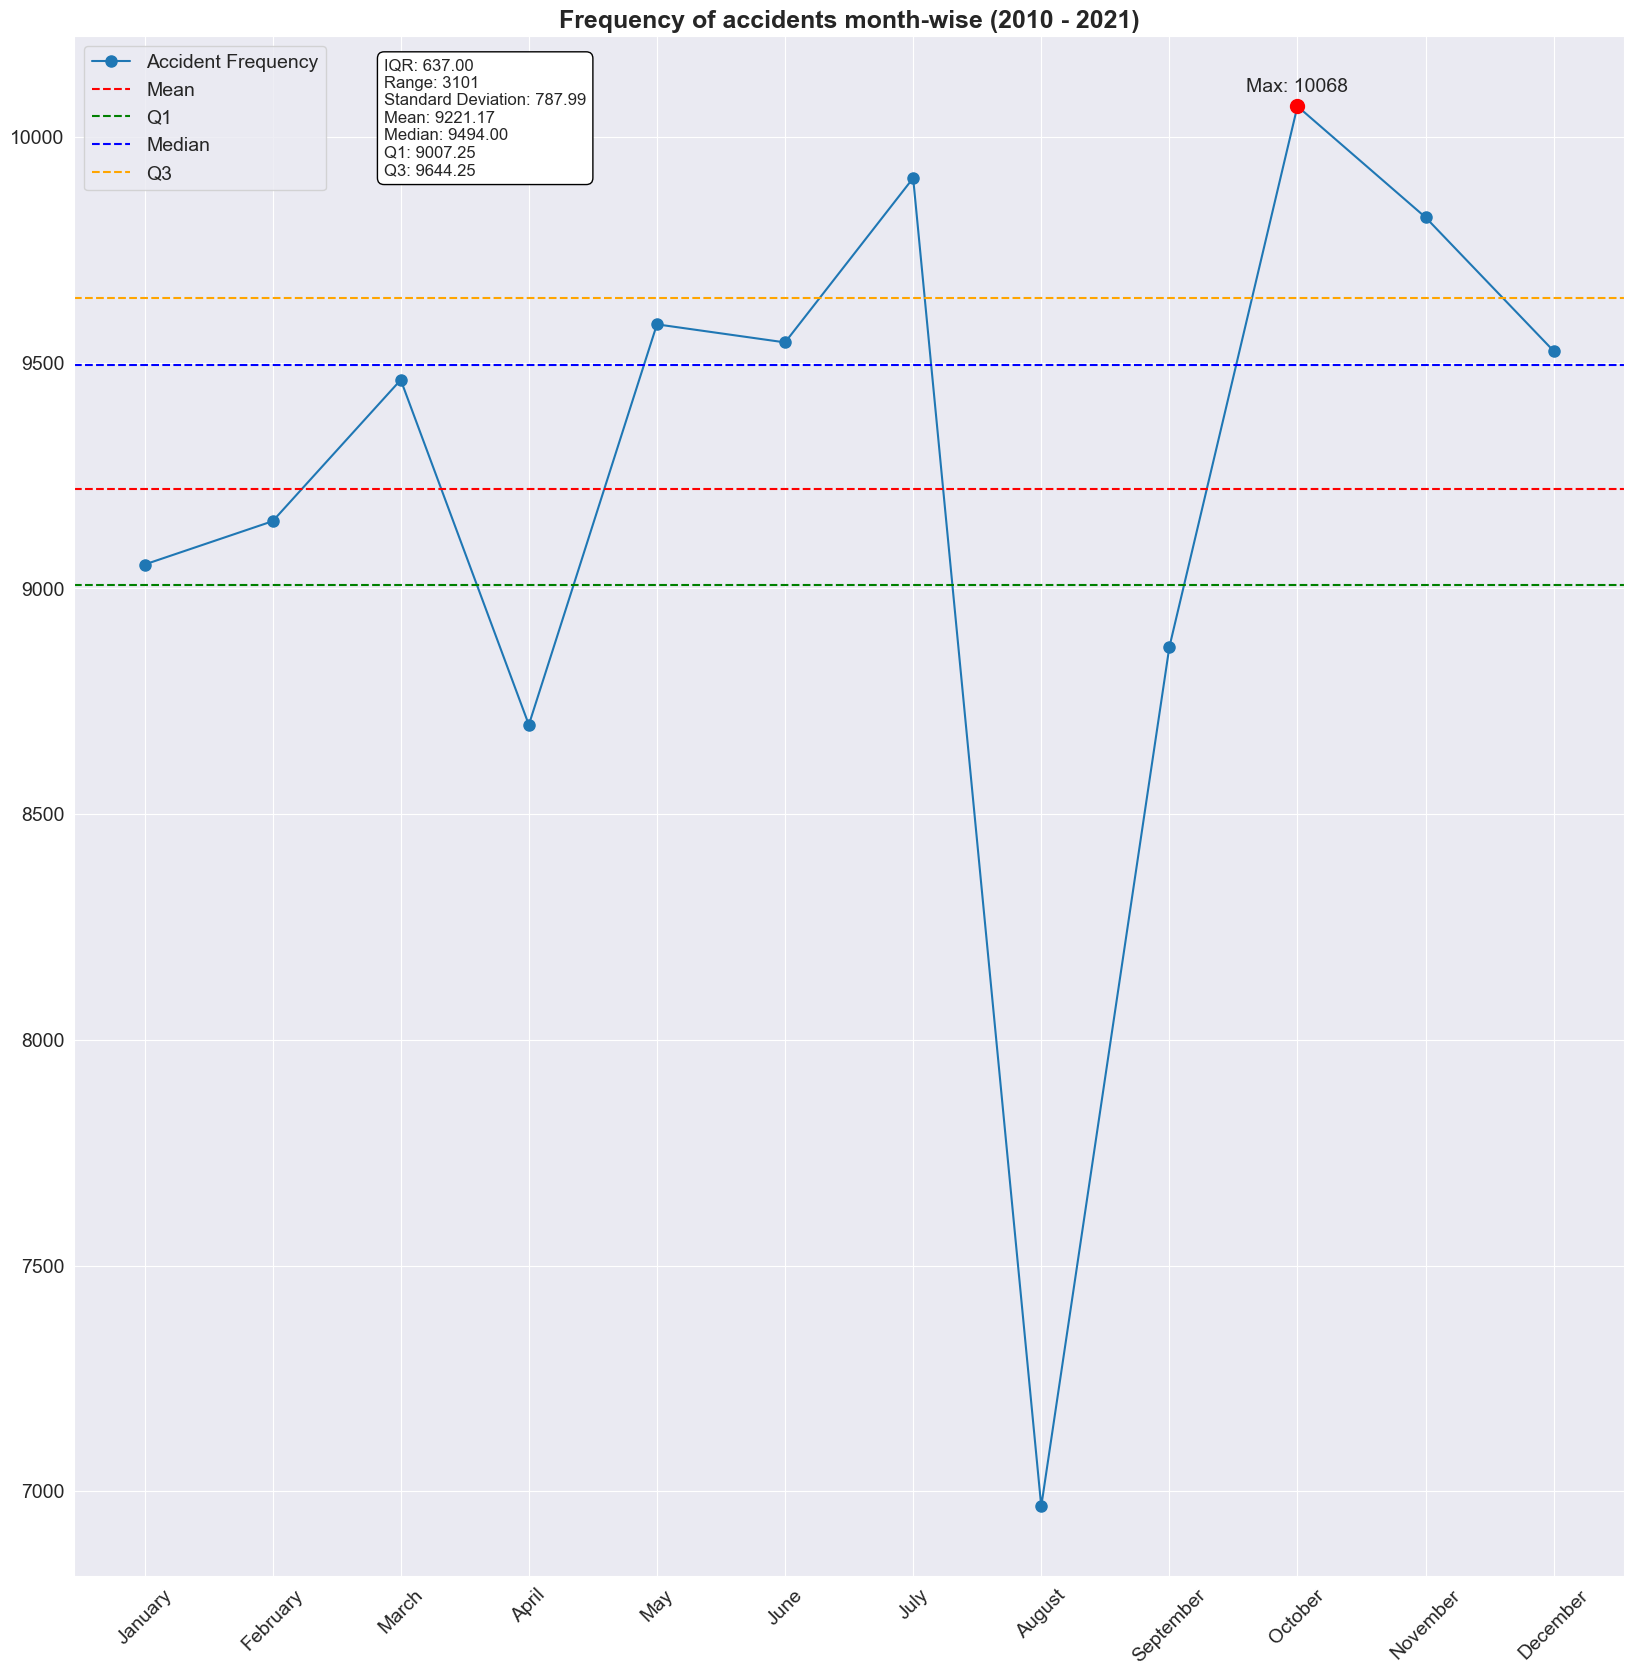

In [159]:
sns.set_style('darkgrid')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(20, 20))

# Line plot with customizations
ax.plot(unique_months, freq_months, marker='o', linestyle='-', markersize=8, label='Accident Frequency')

# Calculate statistical measures for freq_months
mean_value = np.mean(freq_months)
median_value = np.median(freq_months)
q1_value = np.percentile(freq_months, 25)
q3_value = np.percentile(freq_months, 75)
iqr_value = q3_value - q1_value
range_value = max(freq_months) - min(freq_months)
std_deviation = np.std(freq_months)


# Add mean line, Q1 line, median line
ax.axhline(mean_value, color='red', linestyle='--', label='Mean')
ax.axhline(q1_value, color='green', linestyle='--', label='Q1')
ax.axhline(median_value, color='blue', linestyle='--', label='Median')
ax.axhline(q3_value, color='orange', linestyle='--', label='Q3')

# Circle the point at the maximum value
max_months = unique_months[np.argmax(freq_months)]
max_freq = max(freq_months)
ax.scatter(max_months, max_freq, c='red', s=100, zorder=5)
ax.annotate(f'Max: {max_freq}', (max_months, max_freq), textcoords="offset points", xytext=(0, 10), ha='center')

# Add legend
ax.legend()

# Add a title with custom font properties
ax.set_title("Frequency of accidents month-wise (2010 - 2021)", fontsize=18, fontweight='bold')

# Rotate x-axis labels for better readability
ax.set_xticklabels(labels=unique_months, rotation=45)

# Customize the font for the chart
plt.rcParams['font.size'] = 14

# Generate a callout box
callout_text = f"IQR: {iqr_value:.2f}\nRange: {range_value}\nStandard Deviation: {std_deviation:.2f}\nMean: {mean_value:.2f}\nMedian: {median_value:.2f}\nQ1: {q1_value:.2f}\nQ3: {q3_value:.2f}"

ax.annotate(callout_text, xy=(0.2, 0.91), xycoords='axes fraction', bbox=dict(boxstyle="round,pad=0.4", edgecolor="black", facecolor="white"), fontsize=12)

# Show the plot
plt.show()
fig.savefig('freq_of_accidents_district_wise_bar.png')
